In [1]:
import pandas as pd
import numpy as np
import csv
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
# Path Variables for driving data
IMAGE_FILE = './data/driving_log.csv'
IMAGE_PATH = './data/'
out_dir = './images_out'

### Method to load images

In [3]:
def load_images():
    # Import driving data from the log file
    with open(IMAGE_FILE, newline='') as image_file:
        driving_data = list(csv.reader(image_file, skipinitialspace=True, delimiter=',', quoting=csv.QUOTE_NONE))
    return driving_data

In [4]:
### Load test data provided

In [5]:
data = load_images()

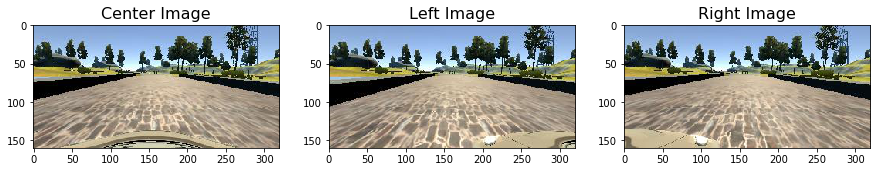

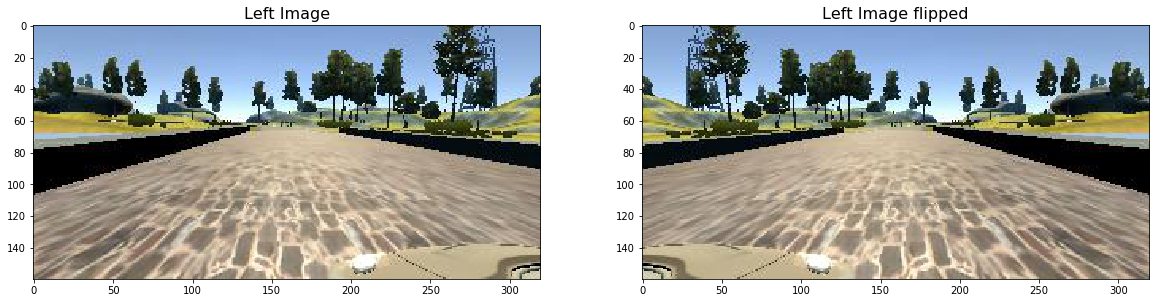

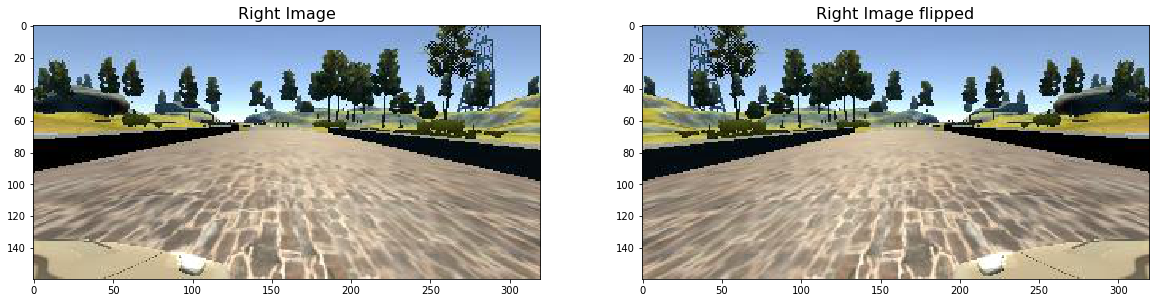

In [25]:
# Visualize the center, left, right cameras in each row
# We see first set of image.
for row in data[1:]:
    # skip it if ~0 speed - not representative of driving behavior
    if float(row[6]) < 0.1 :
        continue
    # get center image path and angle
    center_image = row[0]
    # get left image path and angle
    left_image = row[1]
    # get left image path and angle
    right_image = row[2]
    # Get steering angle for these images.
    # I apply steering correction of 0.25 to images
    center_angles = float(row[3])
    left_angles = float(row[3]) + 0.25
    right_angles = float(row[3]) - 0.25
    
    # Plot an image from three camera angles
    f, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(15,10))
    c_image = cv2.imread(IMAGE_PATH + center_image)
    c_image = cv2.cvtColor(c_image, cv2.COLOR_BGR2RGB)
    axis1.imshow(c_image)
    axis1.set_title('Center Image', fontsize=16)
    l_image = cv2.imread(IMAGE_PATH + left_image)
    l_image = cv2.cvtColor(l_image, cv2.COLOR_BGR2RGB)
    l_flip = cv2.flip(l_image, 1)
    axis2.imshow(l_image)
    axis2.set_title('Left Image', fontsize=16)
    r_image = cv2.imread(IMAGE_PATH + right_image)
    r_image = cv2.cvtColor(r_image, cv2.COLOR_BGR2RGB)
    r_flip = cv2.flip(r_image, 1)
    axis3.imshow(r_image)
    axis3.set_title('Right Image', fontsize=16)
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)
    plt.savefig('{}/Example_Input_Images.jpg'.format(out_dir))
    
    # Plot flipped images
    f, (axis1, axis2) = plt.subplots(1,2, figsize=(20,20))
    axis1.imshow(l_image)
    axis1.set_title('Left Image', fontsize=16)
    axis2.imshow(l_flip)
    axis2.set_title('Left Image flipped', fontsize=16)
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)
    plt.savefig('{}/Left_Flipped_Images.jpg'.format(out_dir))
    
    f, (axis1, axis2) = plt.subplots(1,2, figsize=(20,20))
    axis1.imshow(r_image)
    axis1.set_title('Right Image', fontsize=16)
    axis2.imshow(r_flip)
    axis2.set_title('Right Image flipped', fontsize=16)
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)
    plt.savefig('{}/Right_Flipped_Images.jpg'.format(out_dir))
    
    break